In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from bifurcation import bifurcation_point, draw_bifurcation

%matplotlib widget

## Try to reproduce Vivek's figure

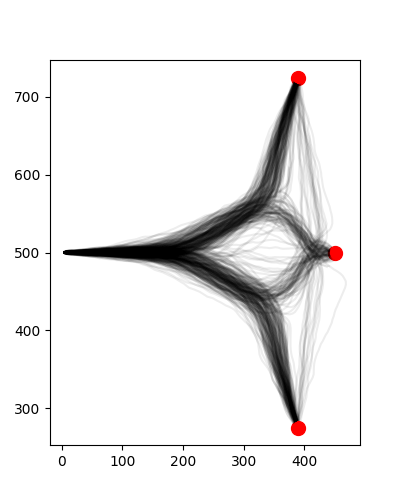

In [11]:
name = 'replicate3tar'

df_cen = pd.read_csv('../output/3targets/centroid_'+name+'.txt', sep='\t')
df_tar = pd.read_csv('../output/3targets/targets_'+name+'.txt', sep='\t')

fig, ax = plt.subplots(figsize=(4, 5))

for i in range(df_cen.replicate.max()+1):
    plt.plot(df_cen.loc[df_cen.replicate==i,:].x, df_cen.loc[df_cen.replicate==i,:].y, c='black', alpha=0.07)

plt.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
plt.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
plt.scatter(df_tar.loc[df_tar.id==2,:].x, df_tar.loc[df_tar.id==2,:].y, c='r', s=100)

## Trajectories plot for increasing number of total agents

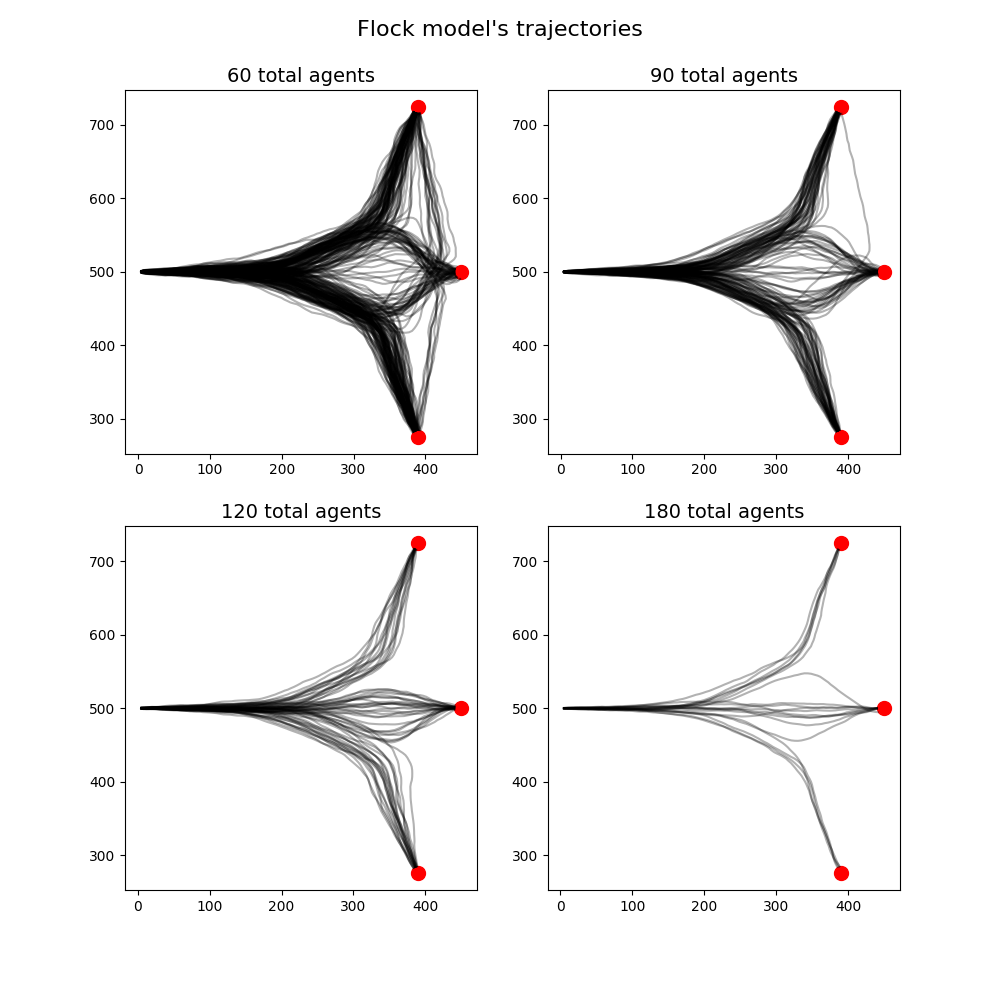

In [28]:
name1 = '60agents'
name2 = '90agents'
name3 = '120agents'
name4 = '180agents'

df_60 = pd.read_csv('../output/3targets/centroid_'+name1+'.txt', sep='\t')
df_90 = pd.read_csv('../output/3targets/centroid_'+name2+'.txt', sep='\t')
df_120 = pd.read_csv('../output/3targets/centroid_'+name3+'.txt', sep='\t')
df_180 = pd.read_csv('../output/3targets/centroid_'+name4+'.txt', sep='\t')
df_tar = pd.read_csv('../output/3targets/targets_'+name1+'.txt', sep='\t')

# filter the dataframes to keep only the trajectories that reach the target
df_60 = df_60.loc[df_60.replicate.isin(df_60.loc[df_60.cue_reached!=-1,:].replicate),:]
df_90 = df_90.loc[df_90.replicate.isin(df_90.loc[df_90.cue_reached!=-1,:].replicate),:]
df_120 = df_120.loc[df_120.replicate.isin(df_120.loc[df_120.cue_reached!=-1,:].replicate),:]
df_180 = df_180.loc[df_180.replicate.isin(df_180.loc[df_180.cue_reached!=-1,:].replicate),:]

# create plot with 3 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

for i in range(df_60.replicate.max()+1):
    ax1.plot(df_60.loc[df_60.replicate==i,:].x, df_60.loc[df_60.replicate==i,:].y, c='black', alpha=0.3)
    ax2.plot(df_90.loc[df_90.replicate==i,:].x, df_90.loc[df_90.replicate==i,:].y, c='black', alpha=0.3)
    ax3.plot(df_120.loc[df_120.replicate==i,:].x, df_120.loc[df_120.replicate==i,:].y, c='black', alpha=0.3)
    ax4.plot(df_180.loc[df_180.replicate==i,:].x, df_180.loc[df_180.replicate==i,:].y, c='black', alpha=0.3)


for ax, title in zip([ax1, ax2, ax3, ax4], [60, 90, 120, 180]):
    ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
    ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
    ax.scatter(df_tar.loc[df_tar.id==2,:].x, df_tar.loc[df_tar.id==2,:].y, c='r', s=100)
    ax.set_title(str(title)+' total agents', fontsize=14)

plt.suptitle("Flock model's trajectories\n", fontsize=16)

# Adjust the spacing between the suptitle and the subplot titles
plt.subplots_adjust(top=0.91)

# save the figure
plt.savefig('../img/3targets_agents.pdf', dpi=300);

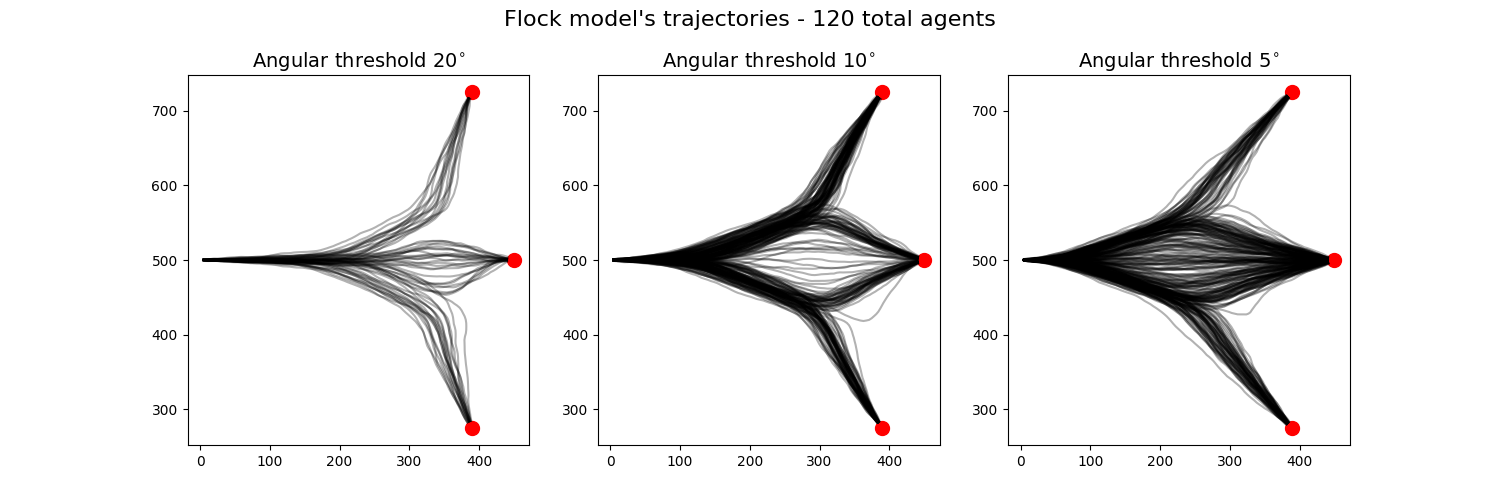

In [31]:
name1 = '120agents'
name2 = '120agents_10feedback'
name3 = '120agents_5feedback'

# create plot with 2 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

df_120 = pd.read_csv('../output/3targets/centroid_'+name1+'.txt', sep='\t')
df_120_10 = pd.read_csv('../output/3targets/centroid_'+name2+'.txt', sep='\t')
df_120_5 = pd.read_csv('../output/3targets/centroid_'+name3+'.txt', sep='\t')

df_120 = df_120.loc[df_120.replicate.isin(df_120.loc[df_120.cue_reached!=-1,:].replicate),:]
df_120_10 = df_120_10.loc[df_120_10.replicate.isin(df_120_10.loc[df_120_10.cue_reached!=-1,:].replicate),:]
df_120_5 = df_120_5.loc[df_120_5.replicate.isin(df_120_5.loc[df_120_5.cue_reached!=-1,:].replicate),:]

for i in range(df_120.replicate.max()+1):
    ax1.plot(df_120.loc[df_120.replicate==i,:].x, df_120.loc[df_120.replicate==i,:].y, c='black', alpha=0.3)
    ax2.plot(df_120_10.loc[df_120_10.replicate==i,:].x, df_120_10.loc[df_120_10.replicate==i,:].y, c='black', alpha=0.3)
    ax3.plot(df_120_5.loc[df_120_5.replicate==i,:].x, df_120_5.loc[df_120_5.replicate==i,:].y, c='black', alpha=0.3)

for ax, title in zip([ax1, ax2, ax3], ['20', '10', '5']):
    ax.scatter(df_tar.loc[df_tar.id==0,:].x, df_tar.loc[df_tar.id==0,:].y, c='r', s=100)
    ax.scatter(df_tar.loc[df_tar.id==1,:].x, df_tar.loc[df_tar.id==1,:].y, c='r', s=100)
    ax.scatter(df_tar.loc[df_tar.id==2,:].x, df_tar.loc[df_tar.id==2,:].y, c='r', s=100)
    ax.set_title('Angular threshold '+title+'$^{\circ}$', fontsize=14)


plt.suptitle("Flock model's trajectories - 120 total agents\n", fontsize=16)

# Adjust the spacing between the suptitle and the subplot titles
plt.subplots_adjust(top=0.85)

plt.savefig('../img/3targets_feedback.pdf', dpi=300);

In [22]:
np.radians(5)

0.08726646259971647